In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import scipy
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Load the car sales dataset
dataset_path = 'car details v4.csv'
car_data = pd.read_csv(dataset_path)

In [ ]:
# Display first 5 rows of data
print("Dataset Preview:")
car_data.head()

Dataset Preview:


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [ ]:
# Check for missing values
missing_values = car_data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64


In [ ]:
def remove_cc_from_engine(data):
    """
    Remove 'cc' from the values in the 'Engine' column.
    """
    data['Engine'] = data['Engine'].str.replace(' cc', '').astype(float)
    return data
car_data = remove_cc_from_engine(car_data)

In [ ]:
def extract_max_power(data):
    """
    Extract numerical values from the 'Max Power' column and create separate columns for 'BHP' and 'RPM'.
    """
    # Extract numerical values for BHP and RPM
    data[['Max Power BHP', 'Max Power RPM']] = data['Max Power'].str.extract(r'(\d+\.?\d*) bhp @ (\d+) rpm')

    # Convert columns to numeric
    data[['Max Power BHP', 'Max Power RPM']] = data[['Max Power BHP', 'Max Power RPM']].apply(pd.to_numeric)

    # Drop the original 'Max Power' column
    data.drop('Max Power', axis=1, inplace=True)

    return data
car_data = extract_max_power(car_data)

In [ ]:
def extract_max_torque(data):
    """
    Extract numerical values from the 'Max Torque' column and create separate columns for 'Torque' and 'RPM'.
    """
    # Extract numerical values for Torque and RPM
    data[['Max Torque Nm', 'Max Torque RPM']] = data['Max Torque'].str.extract(r'(\d+\.?\d*) Nm @ (\d+) rpm')

    # Convert columns to numeric
    data[['Max Torque Nm', 'Max Torque RPM']] = data[['Max Torque Nm', 'Max Torque RPM']].apply(pd.to_numeric)

    # Drop the original 'Max Torque' column
    data.drop('Max Torque', axis=1, inplace=True)

    return data
car_data = extract_max_torque(car_data)

In [ ]:
# Display first 5 rows of data
print("Dataset Preview:")
car_data.head()

Dataset Preview:


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max Power BHP,Max Power RPM,Max Torque Nm,Max Torque RPM
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,FWD,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0000,4500.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,FWD,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0000,2000.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,FWD,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,112.7619,4000.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,FWD,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0000,4200.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,RWD,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0000,1400.0


In [ ]:
car_data.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity', 'Max Power BHP', 'Max Power RPM', 'Max Torque Nm',
       'Max Torque RPM'],
      dtype='object')

In [ ]:
# Handle missing values using SimpleImputer and using mean as the strategy
imputer = SimpleImputer(strategy='mean')
numerical_features = ['Price', 'Kilometer', 'Engine', 'Max Power BHP', 'Max Power RPM', 'Max Torque Nm', 'Max Torque RPM', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']
car_data[numerical_features] = imputer.fit_transform(car_data[numerical_features])

In [ ]:
categorical_features = ['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain']

In [ ]:
# Filling missing values with mode
for feature in categorical_features:
        car_data[feature].fillna(car_data[feature].mode()[0], inplace=True)

In [ ]:
# Check for missing values
missing_values = car_data.isnull().sum()
print("\nMissing Values:")
print(missing_values)
print("Now we have handled all the missing values.")


Missing Values:
Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Max Power BHP         0
Max Power RPM         0
Max Torque Nm         0
Max Torque RPM        0
dtype: int64
Now we have handled all the missing values.


In [ ]:
# Normalize numerical features using StandardScaler
scaler = StandardScaler()
car_data[numerical_features] = scaler.fit_transform(car_data[numerical_features])

In [ ]:
# Exploratory Data Analysis (EDA)
# Visualize data to gain insights
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

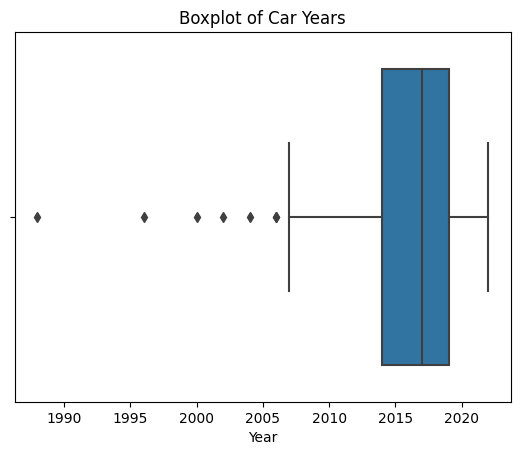

In [ ]:
# Boxplot to identify outliers
sns.boxplot(x='Year', data=car_data)
plt.title('Boxplot of Car Years')
plt.show()

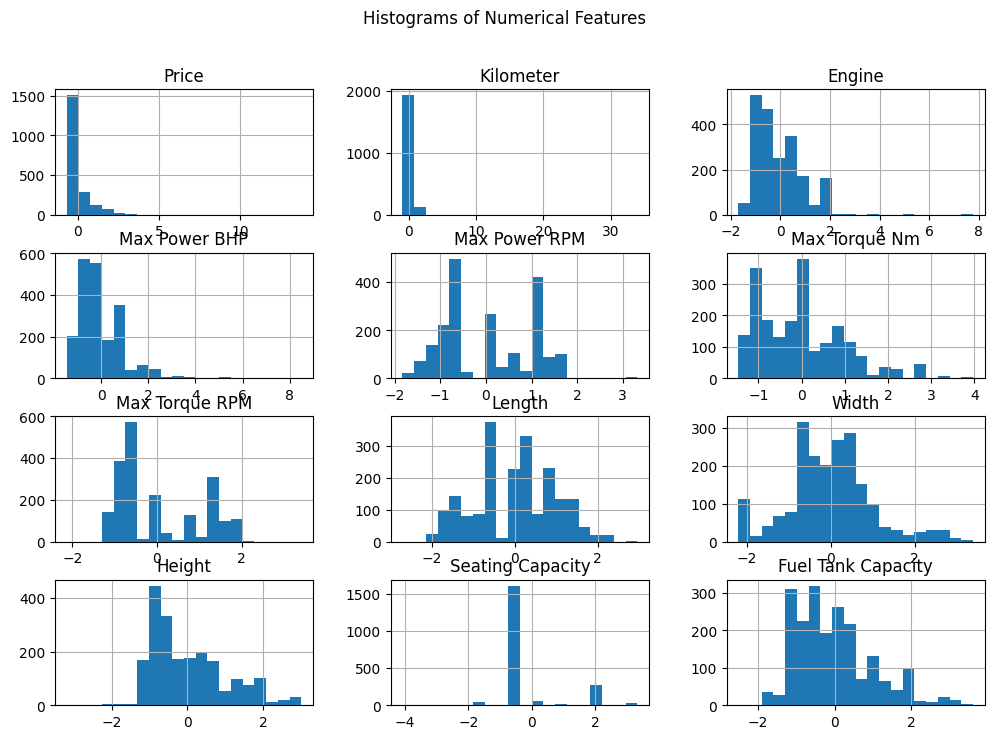

In [ ]:
# Histograms for numerical features
car_data[numerical_features].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [ ]:
# Descriptive statistics
statistics = car_data.describe()
print("\nDescriptive Statistics:")
print(statistics)


Descriptive Statistics:
              Price         Year     Kilometer        Engine        Length  \
count  2.059000e+03  2059.000000  2.059000e+03  2.059000e+03  2.059000e+03   
mean  -5.521459e-17  2016.425449 -4.486185e-17  2.139565e-16  1.621929e-15   
std    1.000243e+00     3.363564  1.000243e+00  1.000243e+00  1.000243e+00   
min   -6.836674e-01  1988.000000 -9.455415e-01 -1.693606e+00 -2.714309e+00   
25%   -5.034499e-01  2014.000000 -4.398550e-01 -7.838621e-01 -6.771890e-01   
50%   -3.629125e-01  2017.000000 -7.366830e-02 -3.083864e-01  7.840582e-02   
75%    9.176578e-02  2019.000000  3.099559e-01  4.793182e-01  7.788812e-01   
max    1.376312e+01  2022.000000  3.392939e+01  7.765190e+00  2.958393e+00   

              Width        Height  Seating Capacity  Fuel Tank Capacity  \
count  2.059000e+03  2.059000e+03      2.059000e+03        2.059000e+03   
mean  -8.903352e-16 -1.593459e-15     -2.001529e-16        1.967020e-16   
std    1.000243e+00  1.000243e+00      1.000243

In [ ]:
# Addressing outliers and removing them
def remove_outliers_iqr(data, feature):
    """
    Remove outliers from a specific feature using IQR.
    """
    # Calculate IQR
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

    return data

In [ ]:
for feature in numerical_features:
        car_data = remove_outliers_iqr(car_data, feature)

In [ ]:
# Save the preprocessed dataset to a new CSV file
car_data.to_csv('preprocessed_car_data.csv', index=False)

In [ ]:
preprocessed_car_data = pd.read_csv('preprocessed_car_data.csv')
preprocessed_car_data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max Power BHP,Max Power RPM,Max Torque Nm,Max Torque RPM
0,Honda,Amaze 1.2 VX i-VTEC,-0.495183,2017,0.574133,Petrol,Manual,Pune,Grey,First,...,FWD,-0.668002,-0.661029,-0.647719,-0.378532,-1.157720,-0.707811,1.148534,-1.052682,1.667664
1,Maruti Suzuki,Swift DZire VDI,-0.517916,2014,0.362268,Diesel,Manual,Ludhiana,White,Second,...,FWD,-0.656519,-0.548343,-0.274331,-0.378532,-0.681074,-0.916825,-0.779048,-0.445979,-0.516990
2,Hyundai,i10 Magna 1.2 Kappa2,-0.612986,2011,0.222769,Petrol,Manual,Lucknow,Maroon,First,...,FWD,-1.598142,-1.299581,-0.311670,-0.378532,-1.157720,-0.836435,1.148534,-1.024505,1.230733
3,Toyota,Glanza G,-0.373659,2019,-0.291637,Petrol,Manual,Mangalore,Red,First,...,FWD,-0.656519,-0.172724,-0.610380,-0.378532,-1.021535,-0.788201,1.148534,-1.022721,1.405506
4,Maruti Suzuki,Ciaz ZXi,-0.424914,2017,0.332886,Petrol,Manual,Pune,Grey,First,...,FWD,0.480318,-0.285410,-0.797074,-0.378532,-0.612981,-0.643500,1.148534,-0.895389,1.230733


In [ ]:
preprocessed_car_data.describe()

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max Power BHP,Max Power RPM,Max Torque Nm,Max Torque RPM
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000
mean,-0.321107,2016.478964,-0.063290,-0.413748,-0.313915,-0.285744,-0.386323,-3.785317e-01,-0.407629,-0.362917,0.227938,-0.408689,0.275853
std,0.299879,3.030540,0.456675,0.513746,0.773428,0.569494,0.554275,5.553362e-17,0.638810,0.556309,0.993144,0.659460,1.068079
min,-0.656387,2006.000000,-0.935079,-1.425754,-1.956418,-1.863010,-1.655867,-3.785317e-01,-1.702459,-1.367009,-1.742838,-1.329818,-2.133634
25%,-0.517916,2014.000000,-0.404980,-0.785447,-0.722548,-0.555856,-0.797074,-3.785317e-01,-0.817258,-0.788201,-0.779048,-1.015231,-0.735455
50%,-0.429874,2017.000000,-0.073668,-0.489067,-0.653074,-0.285410,-0.535703,-3.785317e-01,-0.544889,-0.514876,0.281122,-0.543351,0.000000
75%,-0.239529,2019.000000,0.267339,-0.160989,0.319553,0.165333,0.099057,-3.785317e-01,-0.068243,0.000000,1.148534,0.003431,1.230733
max,0.945321,2022.000000,1.368113,1.274947,1.536773,1.495024,1.256561,-3.785317e-01,1.225512,1.350170,1.726808,1.426561,2.104595


In [ ]:
preprocessed_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1236 non-null   object 
 1   Model               1236 non-null   object 
 2   Price               1236 non-null   float64
 3   Year                1236 non-null   int64  
 4   Kilometer           1236 non-null   float64
 5   Fuel Type           1236 non-null   object 
 6   Transmission        1236 non-null   object 
 7   Location            1236 non-null   object 
 8   Color               1236 non-null   object 
 9   Owner               1236 non-null   object 
 10  Seller Type         1236 non-null   object 
 11  Engine              1236 non-null   float64
 12  Drivetrain          1236 non-null   object 
 13  Length              1236 non-null   float64
 14  Width               1236 non-null   float64
 15  Height              1236 non-null   float64
 16  Seatin

UniVariate Analysis: 


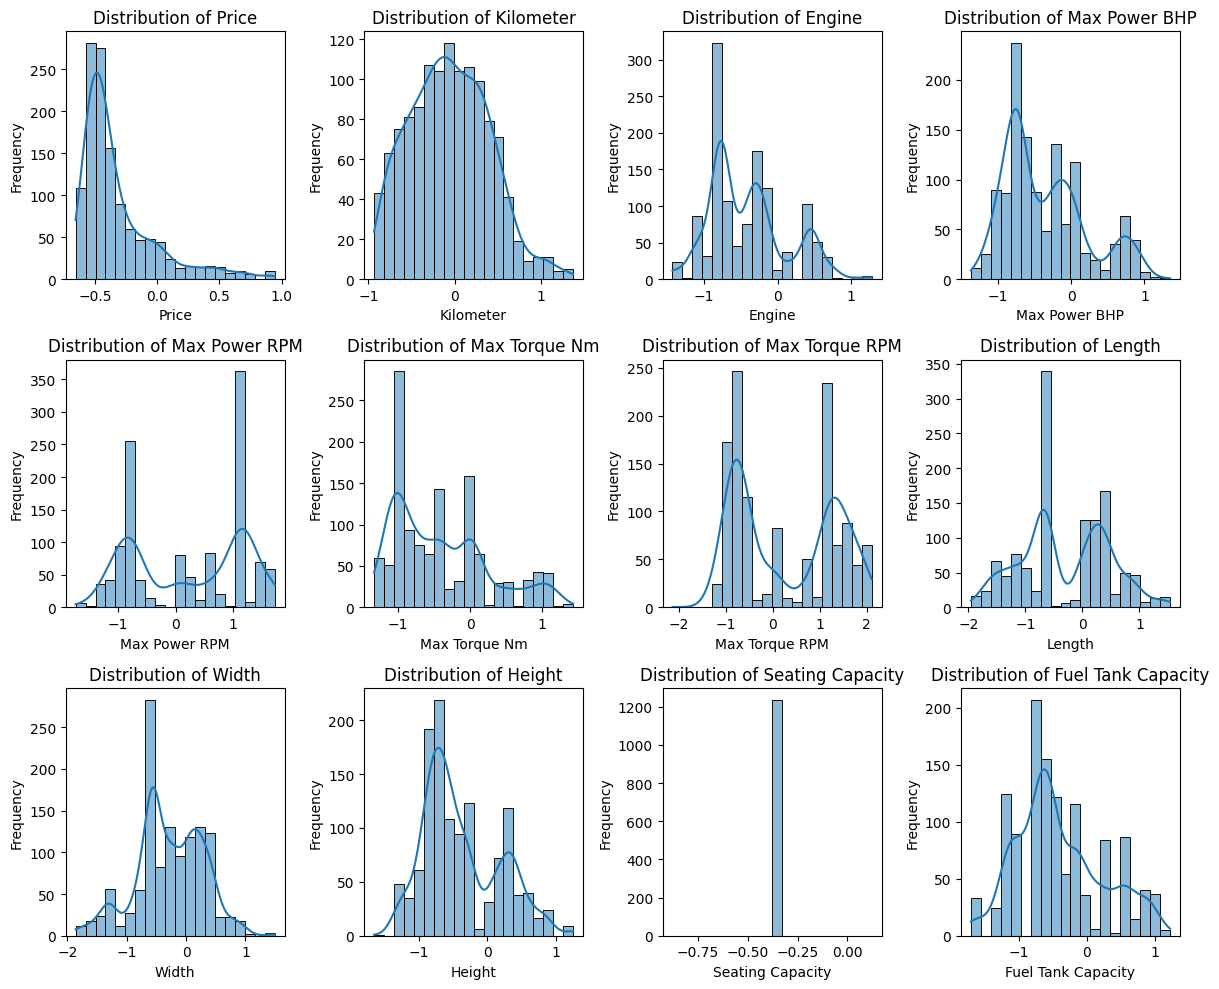

In [ ]:
# 2. Exploratory Data Analysis (EDA)

# Univariate Analysis
print("UniVariate Analysis: ")
plt.figure(figsize=(12, 10))
for feature in numerical_features:
    plt.subplot(3, 4, numerical_features.index(feature)+1)
    sns.histplot(car_data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

BiVariate Analysis: 


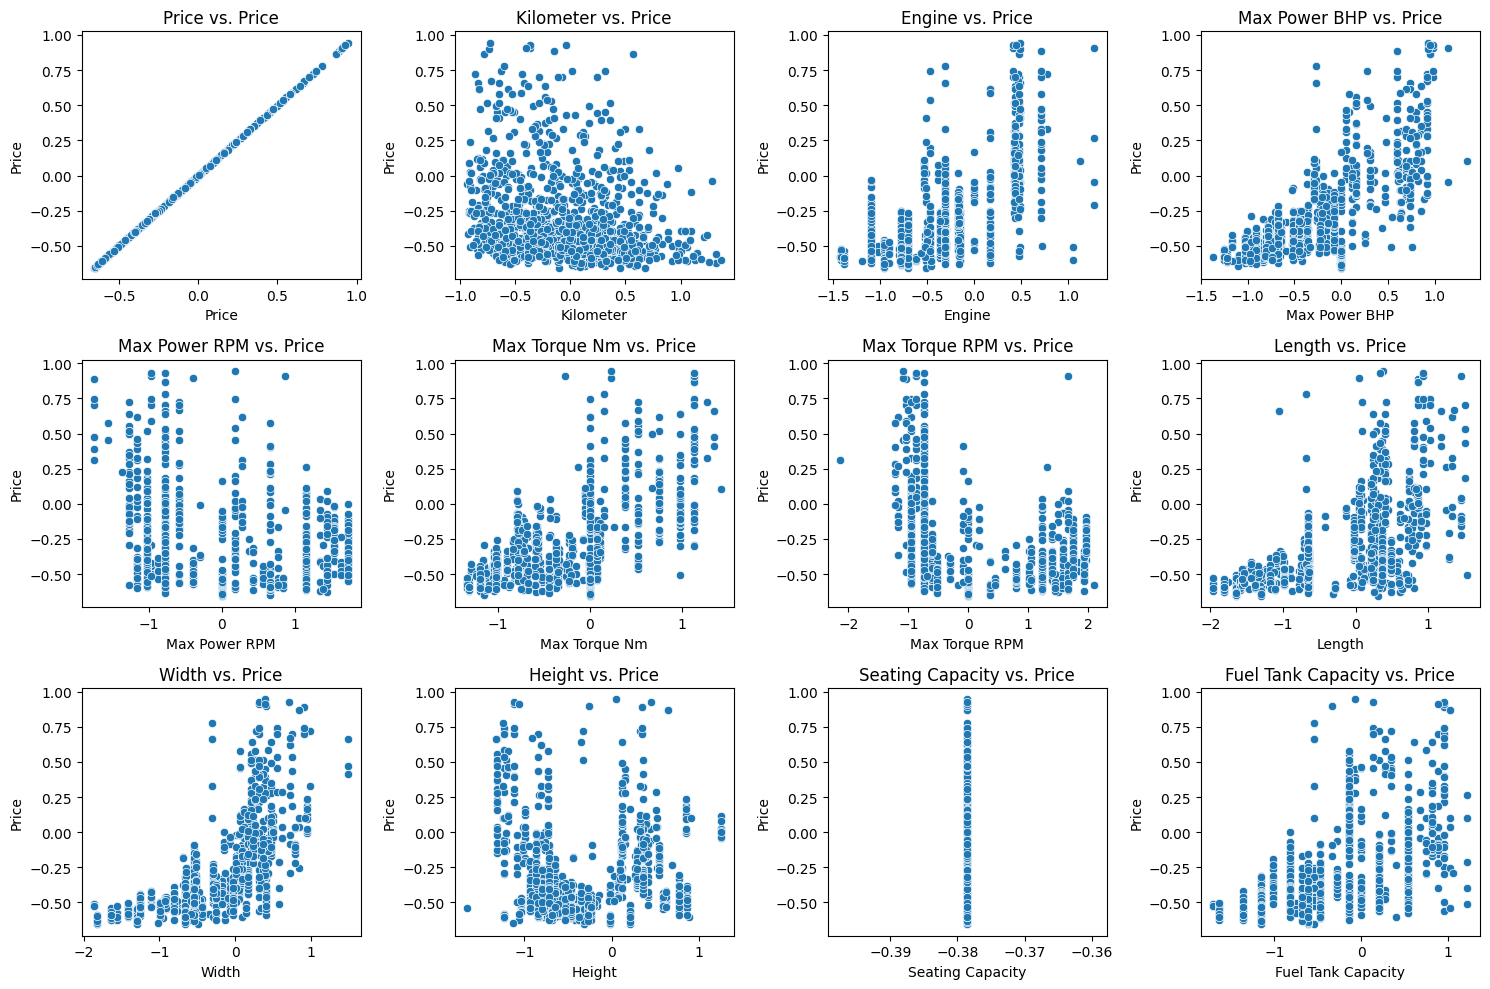

In [ ]:
print("BiVariate Analysis: ")
# Bivariate Analysis
plt.figure(figsize=(15, 10))
for feature in numerical_features:
    plt.subplot(3, 4, numerical_features.index(feature)+1)
    sns.scatterplot(x=car_data[feature], y=car_data['Price'])
    plt.title(f'{feature} vs. Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [ ]:
# Feature Engineering
def convert_categorical_to_numerical(data, categorical_features):
    """
    Convert categorical variables into numerical representations.
    """
    for feature in categorical_features:
        data[feature] = LabelEncoder().fit_transform(data[feature])

    return data

preprocessed_car_data = convert_categorical_to_numerical(preprocessed_car_data, categorical_features)

In [ ]:
car_data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max Power BHP,Max Power RPM,Max Torque Nm,Max Torque RPM
0,Honda,Amaze 1.2 VX i-VTEC,-0.495183,2017,0.574133,Petrol,Manual,Pune,Grey,First,...,FWD,-0.668002,-0.661029,-0.647719,-0.378532,-1.157720,-0.707811,1.148534,-1.052682,1.667664
1,Maruti Suzuki,Swift DZire VDI,-0.517916,2014,0.362268,Diesel,Manual,Ludhiana,White,Second,...,FWD,-0.656519,-0.548343,-0.274331,-0.378532,-0.681074,-0.916825,-0.779048,-0.445979,-0.516990
2,Hyundai,i10 Magna 1.2 Kappa2,-0.612986,2011,0.222769,Petrol,Manual,Lucknow,Maroon,First,...,FWD,-1.598142,-1.299581,-0.311670,-0.378532,-1.157720,-0.836435,1.148534,-1.024505,1.230733
3,Toyota,Glanza G,-0.373659,2019,-0.291637,Petrol,Manual,Mangalore,Red,First,...,FWD,-0.656519,-0.172724,-0.610380,-0.378532,-1.021535,-0.788201,1.148534,-1.022721,1.405506
5,Maruti Suzuki,Ciaz ZXi,-0.424914,2017,0.332886,Petrol,Manual,Pune,Grey,First,...,FWD,0.480318,-0.285410,-0.797074,-0.378532,-0.612981,-0.643500,1.148534,-0.895389,1.230733


In [ ]:
def conduct_hypothesis_tests(data, numerical_features):
    """
    Conduct hypothesis tests to evaluate the significance of variables.
    """
    for feature in numerical_features:
        stat, p_value = ttest_ind(data[data['Drivetrain'] == 0][feature], data[data['Drivetrain'] == 1][feature])
        print(f'Test for {feature} - p-value: {p_value}')

conduct_hypothesis_tests(preprocessed_car_data, numerical_features)

Test for Price - p-value: 1.7395083029790343e-45
Test for Kilometer - p-value: 0.0036324412786053447
Test for Engine - p-value: 2.6418188898677117e-43
Test for Max Power BHP - p-value: 1.6049767213179643e-53
Test for Max Power RPM - p-value: 3.5331672879699136e-14
Test for Max Torque Nm - p-value: 9.02295173767716e-58
Test for Max Torque RPM - p-value: 1.4493207299384154e-11
Test for Length - p-value: 9.008195771997371e-12
Test for Width - p-value: 1.513265351556402e-26
Test for Height - p-value: 3.8392107011242726e-14
Test for Seating Capacity - p-value: 5.373662115050393e-37
Test for Fuel Tank Capacity - p-value: 2.5109752613076e-41


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


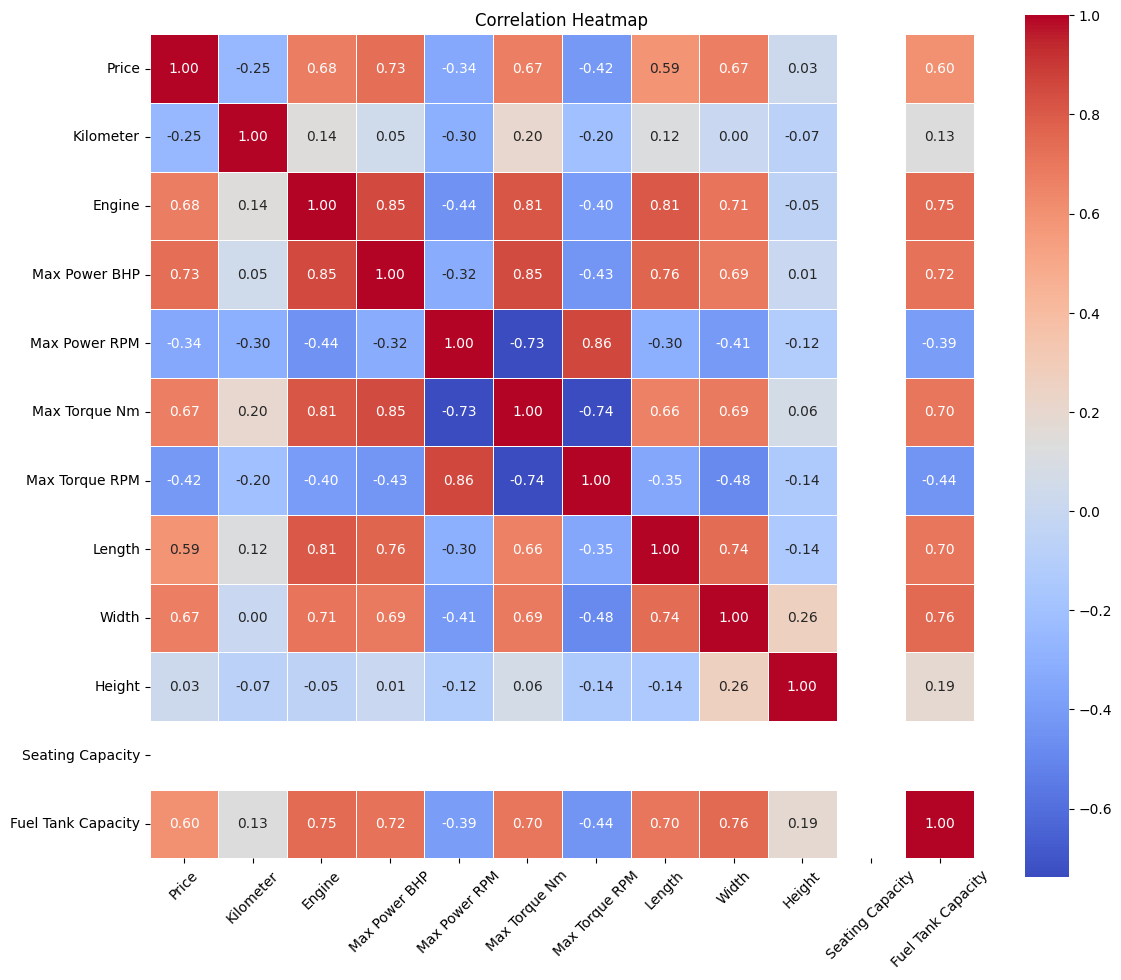

In [ ]:
# Display correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(preprocessed_car_data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Data Visualizations

In [ ]:
#ANOVA test
# Selecting the relevant columns for ANOVA
anova_data = preprocessed_car_data[['Fuel Type', 'Price']]

In [ ]:
# Performing ANOVA test
fuel_types = anova_data['Fuel Type'].unique()
anova_results = {fuel_type: anova_data[anova_data['Fuel Type'] == fuel_type]['Price'] for fuel_type in fuel_types}

In [ ]:
# Performing the ANOVA test
f_statistic, p_value = f_oneway(*anova_results.values())

In [ ]:
# Displaying the results
print(f'ANOVA Results:')
print(f'F-Statistic: {f_statistic}')
print(f'P-Value: {p_value}')

ANOVA Results:
F-Statistic: 25.81684878333002
P-Value: 7.63128909245819e-25


In [ ]:
# Checking the significance level
alpha = 0.05
if p_value < alpha:
    print('The difference in means is statistically significant. Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in means.')

The difference in means is statistically significant. Reject the null hypothesis.


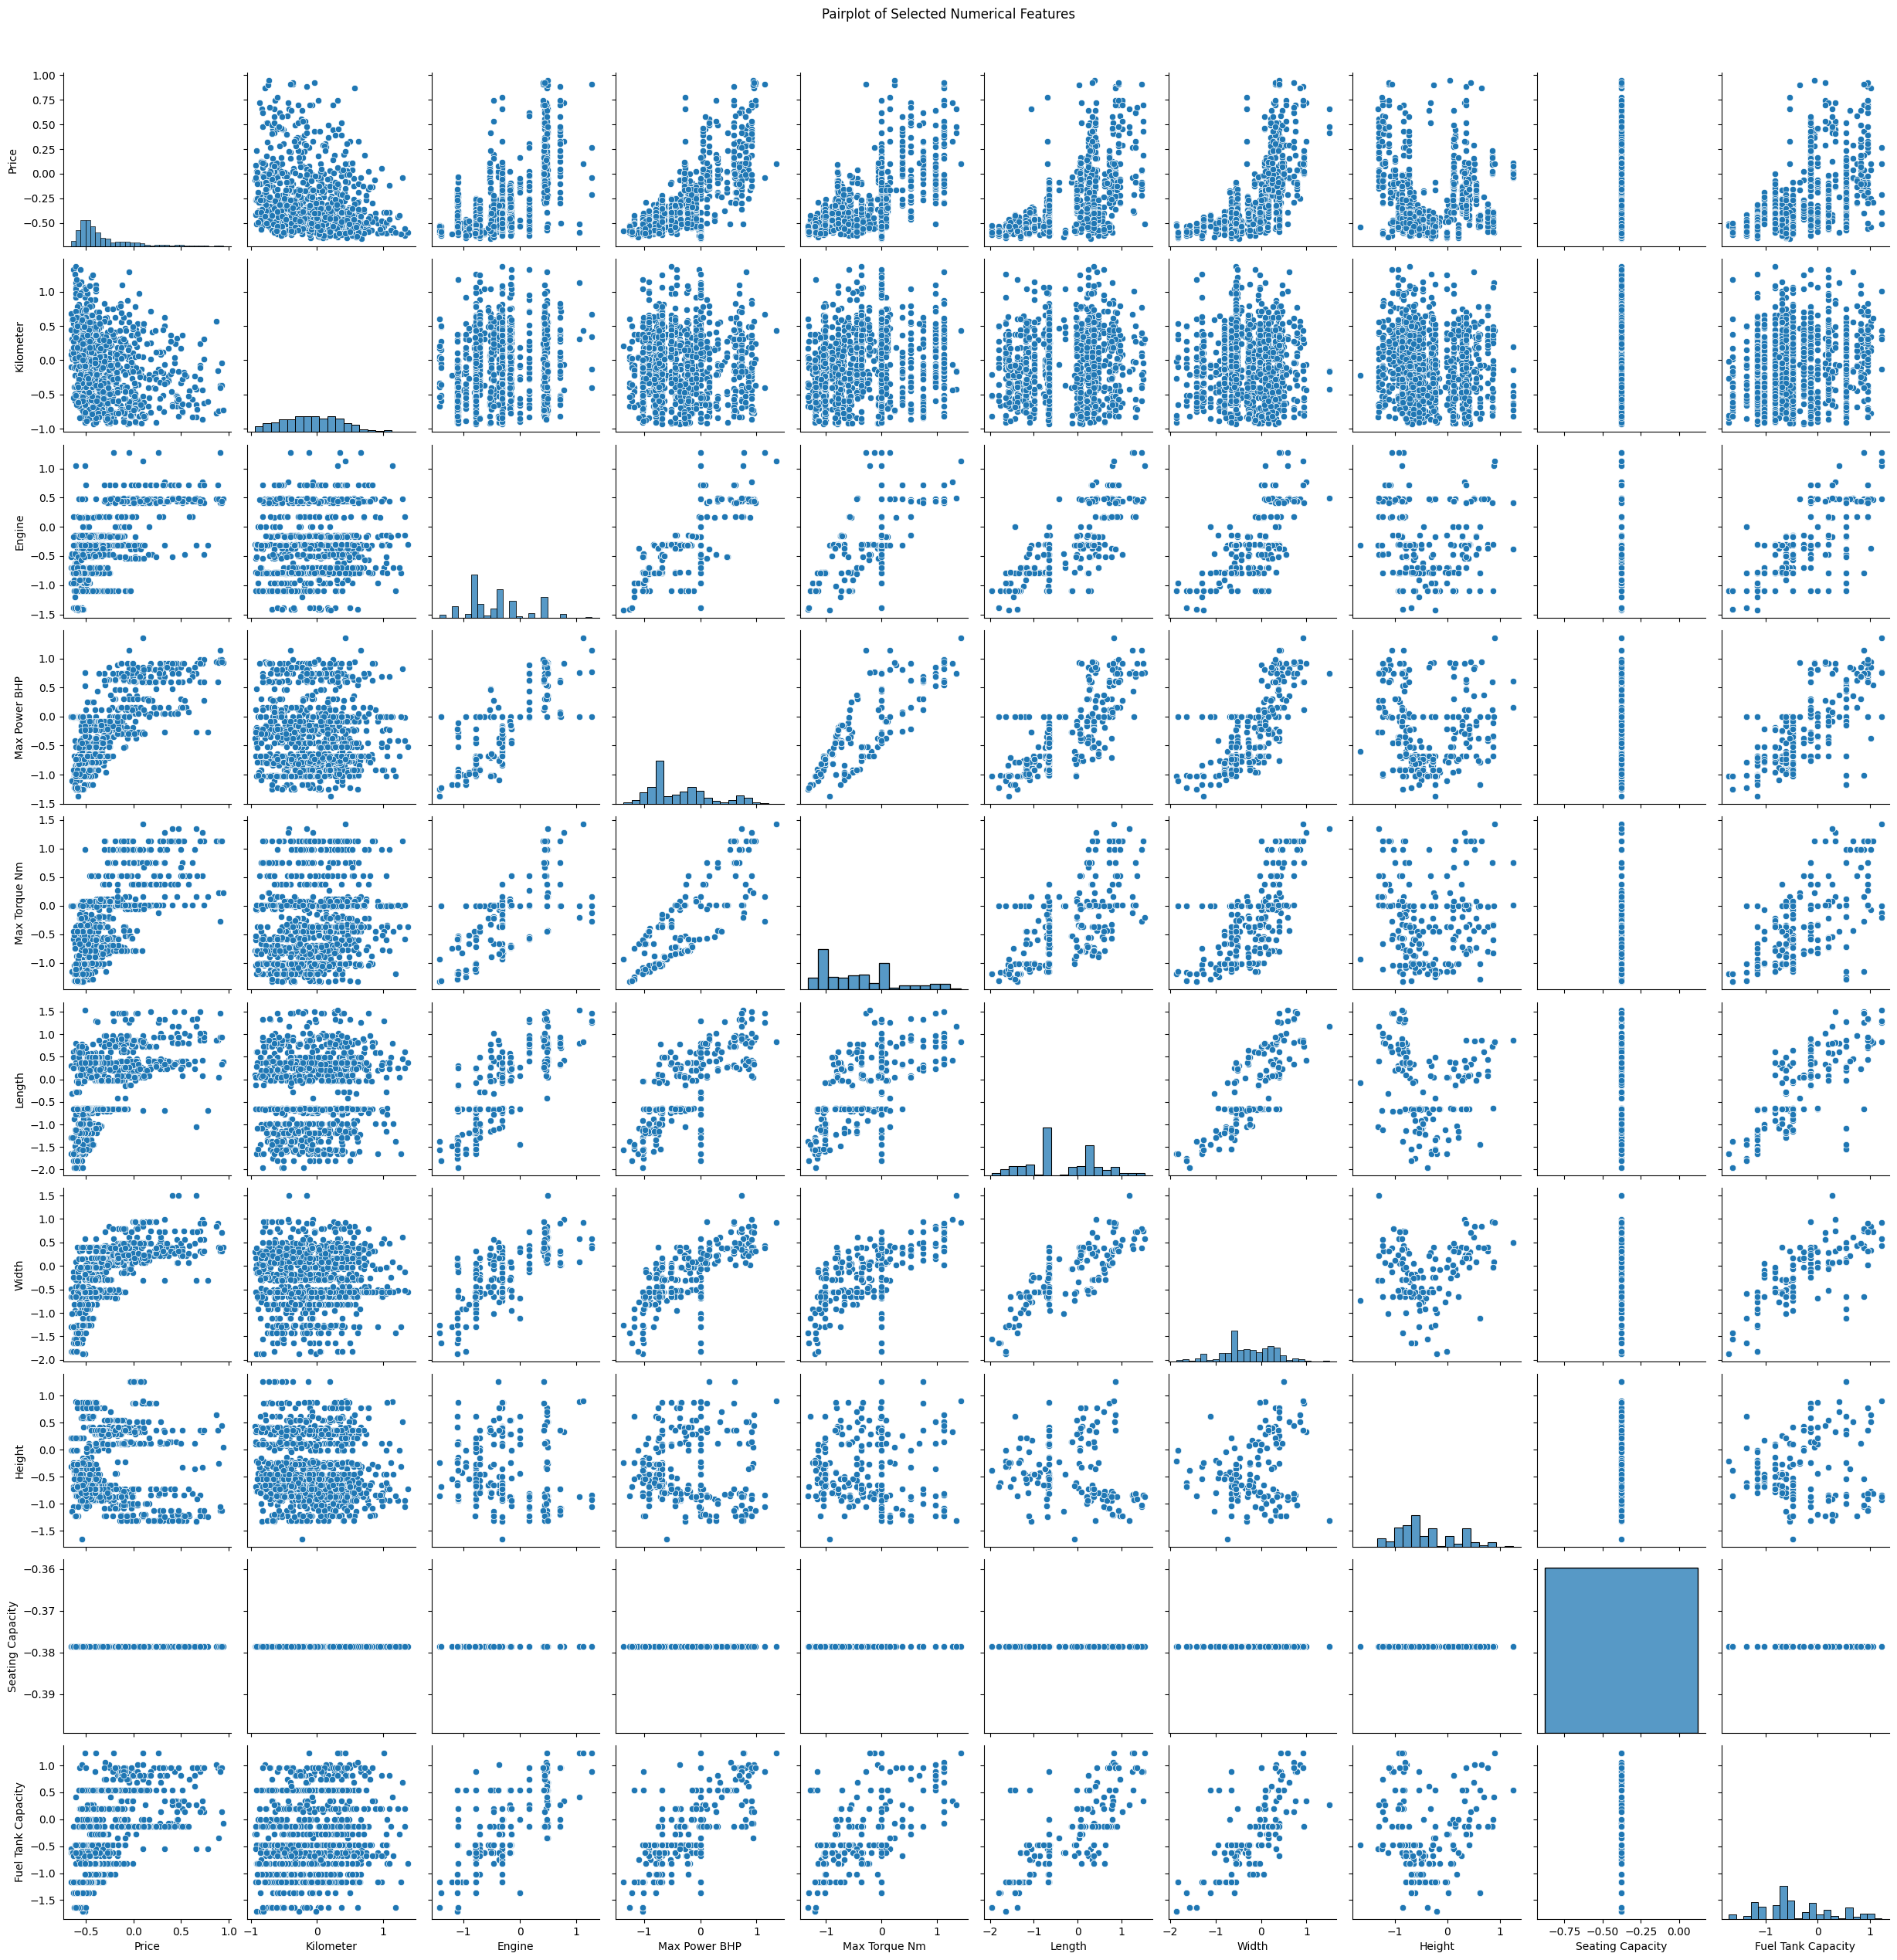

In [ ]:
# Pairplot for selected numerical features
numerical_features = ['Price', 'Kilometer', 'Engine', 'Max Power BHP', 'Max Torque Nm', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']
selected_data = preprocessed_car_data[numerical_features]
sns.pairplot(selected_data)
plt.suptitle('Pairplot of Selected Numerical Features', y=1.02)
plt.show()

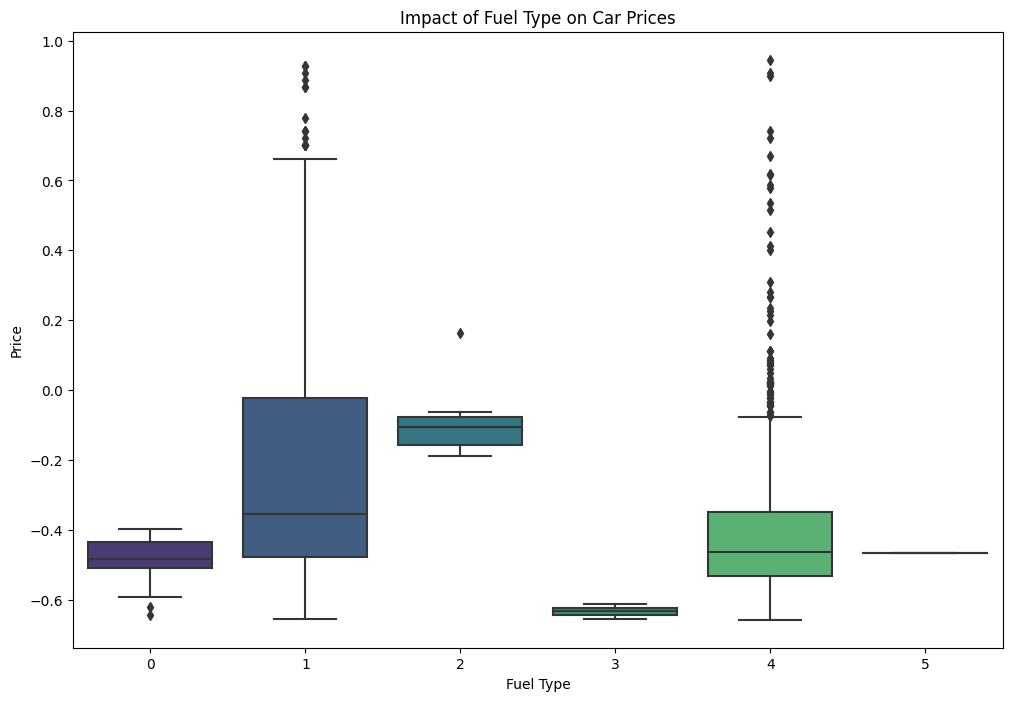

In [ ]:
# Boxplot of 'Fuel Type' vs 'Price'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Fuel Type', y='Price', data=preprocessed_car_data, palette='viridis')
plt.title('Impact of Fuel Type on Car Prices')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

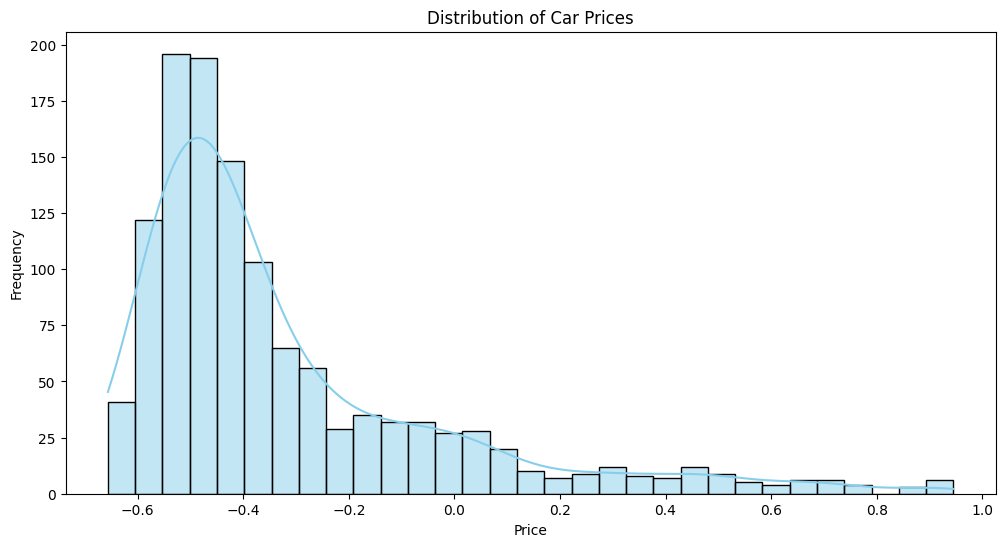

In [ ]:
# Distribution of 'Price'
plt.figure(figsize=(12, 6))
sns.histplot(preprocessed_car_data['Price'], kde=True, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()